In [180]:
import numpy as np
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D


In [181]:
def deltaZ(z: np.ndarray, indexZ: int):
    res = z[indexZ + 1] - z[indexZ]
    return res


def dZp1(z, indexZ):
    res = z[indexZ + 1] - indexZ[indexZ]
    return res


def dZm1(z, indexZ):
    res = z[indexZ] - indexZ[indexZ - 1]
    return res


def deltaZ0(z: np.ndarray, indexZ: int):
    res = z[indexZ + 1] - z[indexZ - 1]
    res /= 2.0
    return res


def df(z: np.ndarray):
    res = -2 * np.sin(z) * np.cos(z)
    return res


def f(z: float):
    res = math.cos(z)
    return res


def g(z: float):
    res = math.sin(z)
    return res


def g12(z: np.ndarray, indexZ: int):
    res = g(z[indexZ + 1]) + g(z[indexZ])
    res /= 2
    return res


In [182]:
maxZmod = 10
sizeZ = 1000
lengthZ = 2 * maxZmod

z = np.linspace(-1, 1, sizeZ)
z = (np.divide(2.0, 1 + np.exp(-z)) - 1.0) * maxZmod

dyExact = df(z)
dy = np.copy(dyExact)


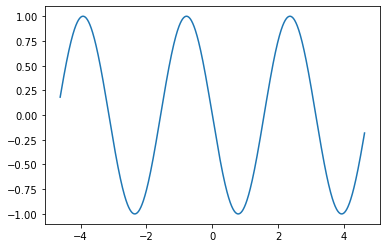

In [183]:
plt.plot(z, dyExact)


In [184]:

for k in range(1, sizeZ - 1):
    dy[k] = f(z[k - 1]) * (2 * (deltaZ(z, k) / deltaZ(z, k - 1)) * g12(z, k - 1) + (1 - (deltaZ(z, k) / deltaZ(z, k - 1))) * g12(z, k)) +\
            f(z[k]) *     (-g12(z, k - 1) * (1 + 2 * (deltaZ(z, k) / deltaZ(z, k - 1)) - (deltaZ(z, k - 1) / deltaZ(z, k)))
                           -g12(z, k) * (1 + 2 * (deltaZ(z, k - 1) / deltaZ(z, k)) - (deltaZ(z, k) / deltaZ(z, k - 1)))) +\
            f(z[k + 1]) * ((1 - (deltaZ(z, k - 1) / deltaZ(z, k))) * g12(z, k - 1) + 2 * (deltaZ(z, k - 1) / deltaZ(z, k)) * g12(z, k))
    dy[k] /= (2 * deltaZ0(z, k) * deltaZ0(z, k))


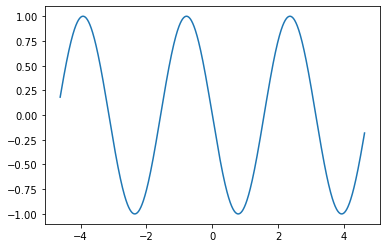

In [185]:
plt.plot(z, dy)


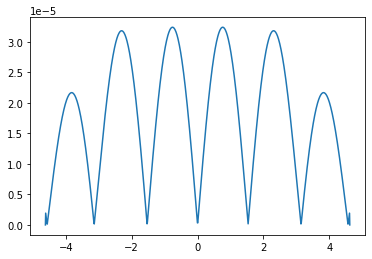

In [186]:
diff = np.abs(dy - dyExact)
plt.plot(z, np.abs(dy - dyExact))
